<center> <span  style=color:blue>    
## FAST FOURIER TRANSFORM </span>

https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/  
http://www.ni.com/white-paper/4844/es/#

<center>
### COMPUTING DISCRETE FOURIER TRANSFORM

In [2]:
import numpy as np
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [2]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [3]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

10 loops, best of 3: 175 ms per loop
10000 loops, best of 3: 87.7 µs per loop


<center>
### SYMMETRIES IN THE DISCRETE FOURIER TRANSFORM

In [4]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N / 2] * X_odd,
                               X_even + factor[N / 2:] * X_odd])

In [5]:
x = np.random.random(1024)
np.allclose(FFT(x), np.fft.fft(x))

C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


True

In [6]:
%timeit DFT_slow(x)
%timeit FFT(x)
%timeit np.fft.fft(x)

10 loops, best of 3: 171 ms per loop


C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


100 loops, best of 3: 7.18 ms per loop
The slowest run took 4.45 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 82.6 µs per loop


<center> 
### VECTORIZED NUMPY VERSION

In [7]:
def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] / 2]
        X_odd = X[:, X.shape[1] / 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

In [8]:
x = np.random.random(1024)
np.allclose(FFT_vectorized(x), np.fft.fft(x))

C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


True

In [9]:
x = np.random.random(1024 * 16)
%timeit FFT(x)
%timeit FFT_vectorized(x)
%timeit np.fft.fft(x)

C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


10 loops, best of 3: 122 ms per loop


C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


100 loops, best of 3: 8.12 ms per loop
100 loops, best of 3: 2.38 ms per loop


<center> 
<span style = color:blue> 
## scipy.fftpack
<span>

https://scipy.github.io/devdocs/tutorial/fftpack.html


In [13]:
from scipy.fftpack import fft, ifft
# There is an array of points at an specific axis
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
# Show fast fourier output
print(y)
yinv = ifft(y)
# It is logical that after computing the inverse transform the result would be the original input
yinv

# From FFT definition it can be demonstrated that first term is equal to the sum of input values
print(np.sum(x))

[ 4.50000000+0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
4.5


### Signal sum of two sines (temporary response)

In [14]:
import matplotlib.pyplot as plt 

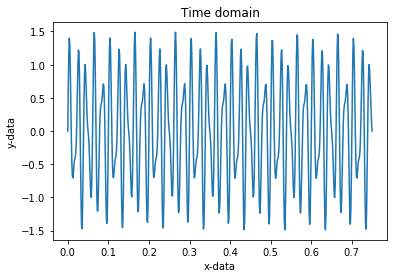

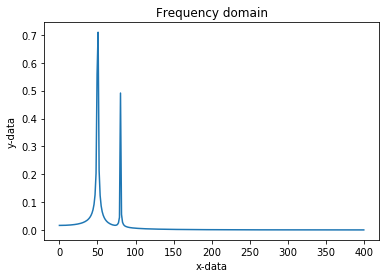

In [72]:
# Number of sample points
N = 600
# Sample spacing
T = 1/800
# equally spaced input value  (initial,step,end)
x = np.linspace(0,N*T,N)
y = np.sin(50 * 2 * np.pi*x) + 0.5*np.sin(80*2*np.pi*x)
plt.figure(1)
plt.plot(x,y)
plt.xlabel('x-data')
plt.ylabel('y-data')
plt.title('Time domain')
plt.show()

# https://stackoverflow.com/questions/6916978/how-do-i-tell-matplotlib-to-create-a-second-new-plot-then-later-plot-on-the-o
# computing FFT
yf = fft(y)
# because x input belongs real domain, positive frequencies can be represented as:
plt.figure(2)
xf = np.linspace(0,1/(2*T),N//2)
yf = 2/N*np.abs(yf[0:N//2])
plt.plot(xf,yf)
plt.xlabel('x-data')
plt.ylabel('y-data')
plt.title('Frequency domain')
plt.show()

## Method 2 

# Creating two plot objects          
#fig1 = plt.figure()
#fig2 = plt.figure()
#ax1 = fig1.add_subplot(111)
#ax1.plot(x, y)
#ax2 = fig2.add_subplot(111)
#ax2.plot(xf,2/N*np.abs(yf[0:N//2]))


<center>
### Windowing

#### Let's window previous frequency response

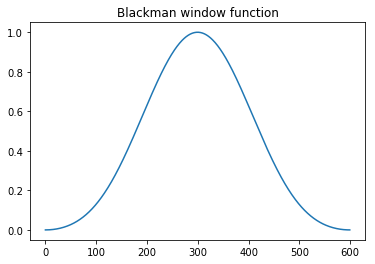

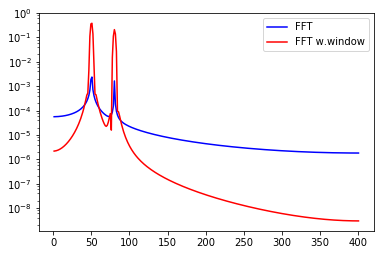

In [75]:
# Number of sample points
N = 600
# Sample spacing
T = 1/800
# equally spaced input value  (initial,step,end)
x = np.linspace(0,N*T,N)
y = np.sin(50 * 2 * np.pi*x) + 0.5*np.sin(80*2*np.pi*x)
yf = fft(y)
# because x input belongs real domain, positive frequencies can be represented as:
xf = np.linspace(0,1/(2*T),N//2)
yf = 2/N*np.abs(yf[0:N//2])
from scipy.signal import blackman
# blackman is a kind of window function
w = blackman(N)
plt.figure(1)
plt.plot(w)
plt.title('Blackman window function')
plt.show()
# Convolution of y and w and its frequency response
ywf = fft(y*w)
# Only positive frequency domain is going to be shown
plt.figure(2)
plt.semilogy(xf[1:N//2],2/N*np.abs(yf[1:N//2]),'-b')
plt.semilogy(xf[1:N//2],2/N*np.abs(ywf[1:N//2]),'-r')
plt.legend(['FFT','FFT w.window'])
plt.grid
plt.show()